In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Online Retail.csv')


In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.fillna({"CustomerID":df["CustomerID"].mean(),
        "Description":df["Description"].mode()[0]},inplace=True )

In [6]:
df.drop(df.index[1:535660], inplace=True)

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00000,United Kingdom
535660,581217,22624,IVORY KITCHEN SCALES,3,12/8/2011 9:20,16.63,15287.69057,United Kingdom
535661,581217,22625,RED KITCHEN SCALES,1,12/8/2011 9:20,16.63,15287.69057,United Kingdom
535662,581217,22629,SPACEBOY LUNCH BOX,4,12/8/2011 9:20,1.95,15287.69057,United Kingdom
535663,581217,22631,CIRCUS PARADE LUNCH BOX,1,12/8/2011 9:20,4.13,15287.69057,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.00000,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.00000,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.00000,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.00000,France


In [8]:
df = df.reset_index()
df["InvoiceNo"]==5

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00000,United Kingdom
1,535660,581217,22624,IVORY KITCHEN SCALES,3,12/8/2011 9:20,16.63,15287.69057,United Kingdom
2,535661,581217,22625,RED KITCHEN SCALES,1,12/8/2011 9:20,16.63,15287.69057,United Kingdom
3,535662,581217,22629,SPACEBOY LUNCH BOX,4,12/8/2011 9:20,1.95,15287.69057,United Kingdom
4,535663,581217,22631,CIRCUS PARADE LUNCH BOX,1,12/8/2011 9:20,4.13,15287.69057,United Kingdom
...,...,...,...,...,...,...,...,...,...
6245,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.00000,France
6246,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.00000,France
6247,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.00000,France
6248,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.00000,France


In [9]:
df.corr()

,index,Quantity,UnitPrice,CustomerID
index,1.000000,0.000279,0.000650,-0.047985
Quantity,0.000279,1.000000,-0.000311,0.000868
UnitPrice,0.000650,-0.000311,1.000000,0.009535
CustomerID,-0.047985,0.000868,0.009535,1.000000


In [10]:
df['Description'].value_counts()

RABBIT NIGHT LIGHT                   23
PAPER CHAIN KIT 50'S CHRISTMAS       21
HAND WARMER OWL DESIGN               19
BICYCLE PUNCTURE REPAIR KIT          18
PAPER CHAIN KIT VINTAGE CHRISTMAS    18
                                     ..
VINTAGE RED TRIM ENAMEL BOWL          1
DOORMAT WELCOME SUNRISE               1
LETTER "A" BLING KEY RING             1
LETTER "D" BLING KEY RING             1
PACK OF 20 SPACEBOY NAPKINS           1
Name: Description, Length: 1794, dtype: int64

<AxesSubplot:>

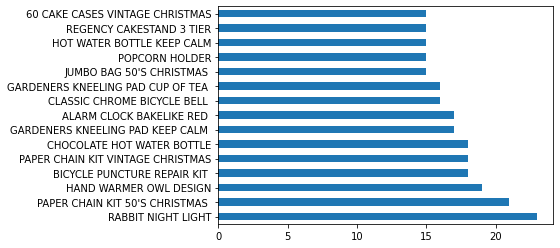

In [11]:
df['Description'].value_counts()[:15].plot(kind='barh')

In [12]:
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,6250.000000,6250.000000,6250.000000,6250.000000
mean,538697.794560,7.301920,4.786742,15140.463307
std,7049.842442,1449.371691,38.721289,1234.267301
min,0.000000,-80995.000000,0.000000,12358.000000
25%,537221.250000,1.000000,1.250000,14698.000000
50%,538783.500000,2.000000,2.460000,15287.690570
75%,540345.750000,6.000000,4.150000,15287.690570
max,541908.000000,80995.000000,1714.170000,18223.000000


In [13]:
# Count of unique customers
df['CustomerID'].nunique()

153

In [14]:
df['Description'] = df['Description'].str.strip()

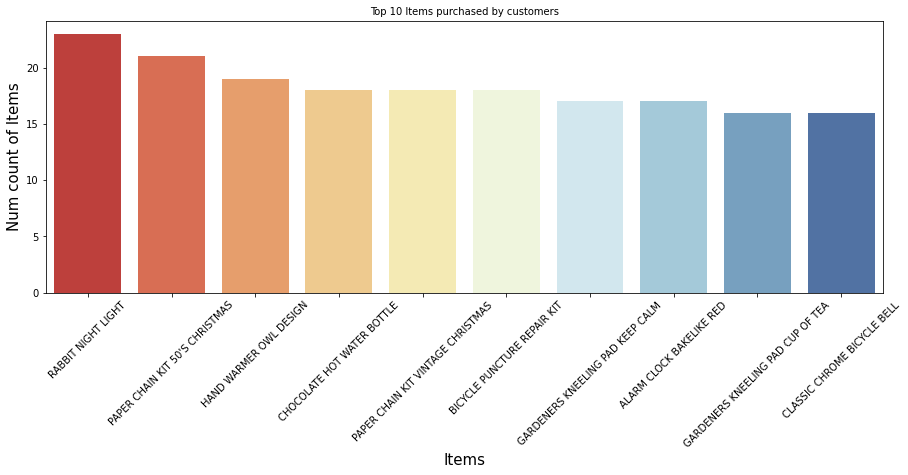

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Description.value_counts().head(10).index, y = df.Description.value_counts().head(10).values, palette = 'RdYlBu')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Num count of Items', size = 15)
plt.title('Top 10 Items purchased by customers', color = 'Black', size = 10)
plt.show()

Renaming the description column to Items

In [25]:
data=df.rename(columns={"Description": "items"})

In [26]:
data

,index,InvoiceNo,StockCode,items,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00000,United Kingdom
1,535660,581217,22624,IVORY KITCHEN SCALES,3,12/8/2011 9:20,16.63,15287.69057,United Kingdom
2,535661,581217,22625,RED KITCHEN SCALES,1,12/8/2011 9:20,16.63,15287.69057,United Kingdom
3,535662,581217,22629,SPACEBOY LUNCH BOX,4,12/8/2011 9:20,1.95,15287.69057,United Kingdom
4,535663,581217,22631,CIRCUS PARADE LUNCH BOX,1,12/8/2011 9:20,4.13,15287.69057,United Kingdom
...,...,...,...,...,...,...,...,...,...
6245,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.00000,France
6246,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.00000,France
6247,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.00000,France
6248,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.00000,France


In [27]:
transactions = data.groupby(['InvoiceNo','items'])['items'].count().reset_index(name ='Count')


In [28]:
transactions

,InvoiceNo,items,Count
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,1
1,581217,3 PIECE SPACEBOY COOKIE CUTTER SET,1
2,581217,3 RAFFIA RIBBONS 50'S CHRISTMAS,1
3,581217,3 RAFFIA RIBBONS VINTAGE CHRISTMAS,1
4,581217,3 WHITE CHOC MORRIS BOXED CANDLES,1
...,...,...,...
6126,C581490,ZINC T-LIGHT HOLDER STARS SMALL,1
6127,C581499,Manual,1
6128,C581568,VICTORIAN SEWING BOX LARGE,1
6129,C581569,36 PENCILS TUBE RED RETROSPOT,1


In [29]:
items_basket = transactions.pivot_table(index='InvoiceNo', columns='items', values='Count', aggfunc='sum').fillna(0)
items_basket.head()

items,10 COLOUR SPACEBOY PEN,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,...,ZINC HEARTS PLANT POT HOLDER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,missing,smashed
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
581218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581219,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
581220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
def basket_encode(z):
    if z<=0:
        return 0
    if z>=1:
        return 1
items_basket_sets = items_basket.applymap(basket_encode)

In [34]:
items_basket_sets

items,10 COLOUR SPACEBOY PEN,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,...,ZINC HEARTS PLANT POT HOLDER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,missing,smashed
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
581218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581219,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
581220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
C581499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# The 'apriori algorithm' with min_support=0.05 (5% of 192)
freq_items = apriori(items_basket_sets, min_support = 0.05,use_colnames = True)
freq_items

c:\users\ht\appdata\local\programs\python\python37\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,support,itemsets
0,0.057292,(6 RIBBONS ELEGANT CHRISTMAS)
1,0.078125,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.067708,(ALARM CLOCK BAKELIKE GREEN)
3,0.052083,(ALARM CLOCK BAKELIKE IVORY)
4,0.088542,(ALARM CLOCK BAKELIKE RED)
...,...,...
88,0.052083,"(HAND WARMER OWL DESIGN, HAND WARMER BIRD DESIGN)"
89,0.057292,"(HAND WARMER OWL DESIGN, HAND WARMER RED LOVE ..."
90,0.062500,"(HAND WARMER OWL DESIGN, HAND WARMER RED RETRO..."
91,0.057292,"(HAND WARMER UNION JACK, HAND WARMER RED LOVE ..."


In [36]:
r = association_rules(freq_items, metric = "lift", min_threshold = 1)
r.sort_values('confidence', ascending = False, inplace = True)


In [37]:
r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(HAND WARMER RED RETROSPOT),(HAND WARMER OWL DESIGN),0.067708,0.098958,0.062500,0.923077,9.327935,0.055800,11.713542
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.067708,0.088542,0.057292,0.846154,9.556561,0.051297,5.924479
3,(CLASSIC BICYCLE CLIPS),(BICYCLE PUNCTURE REPAIR KIT),0.067708,0.083333,0.057292,0.846154,10.153846,0.051649,5.958333
11,(HAND WARMER BIRD DESIGN),(HAND WARMER OWL DESIGN),0.062500,0.098958,0.052083,0.833333,8.421053,0.045898,5.406250
19,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.083333,0.098958,0.067708,0.812500,8.210526,0.059462,4.805556
13,(HAND WARMER RED LOVE HEART),(HAND WARMER OWL DESIGN),0.072917,0.098958,0.057292,0.785714,7.939850,0.050076,4.204861
16,(HAND WARMER UNION JACK),(HAND WARMER RED LOVE HEART),0.072917,0.072917,0.057292,0.785714,10.775510,0.051975,4.326389
17,(HAND WARMER RED LOVE HEART),(HAND WARMER UNION JACK),0.072917,0.072917,0.057292,0.785714,10.775510,0.051975,4.326389
9,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.083333,0.088542,0.062500,0.750000,8.470588,0.055122,3.645833
7,(HOT WATER BOTTLE KEEP CALM),(CHOCOLATE HOT WATER BOTTLE),0.078125,0.088542,0.057292,0.733333,8.282353,0.050374,3.417969


In [38]:
r.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(HAND WARMER RED RETROSPOT),(HAND WARMER OWL DESIGN),0.067708,0.098958,0.062500,0.923077,9.327935,0.055800,11.713542
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.067708,0.088542,0.057292,0.846154,9.556561,0.051297,5.924479
3,(CLASSIC BICYCLE CLIPS),(BICYCLE PUNCTURE REPAIR KIT),0.067708,0.083333,0.057292,0.846154,10.153846,0.051649,5.958333
11,(HAND WARMER BIRD DESIGN),(HAND WARMER OWL DESIGN),0.062500,0.098958,0.052083,0.833333,8.421053,0.045898,5.406250
19,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.083333,0.098958,0.067708,0.812500,8.210526,0.059462,4.805556
13,(HAND WARMER RED LOVE HEART),(HAND WARMER OWL DESIGN),0.072917,0.098958,0.057292,0.785714,7.939850,0.050076,4.204861
16,(HAND WARMER UNION JACK),(HAND WARMER RED LOVE HEART),0.072917,0.072917,0.057292,0.785714,10.775510,0.051975,4.326389
17,(HAND WARMER RED LOVE HEART),(HAND WARMER UNION JACK),0.072917,0.072917,0.057292,0.785714,10.775510,0.051975,4.326389
9,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.083333,0.088542,0.062500,0.750000,8.470588,0.055122,3.645833
7,(HOT WATER BOTTLE KEEP CALM),(CHOCOLATE HOT WATER BOTTLE),0.078125,0.088542,0.057292,0.733333,8.282353,0.050374,3.417969
